# Exercise Set 8


## Mohaddeseh Mozaffari

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load data

In [5]:
data = np.loadtxt("/home/mohaddeseh/Documents/Programing/Computational/HW8/dataprofile.txt")

In [11]:
data = data[:,1]

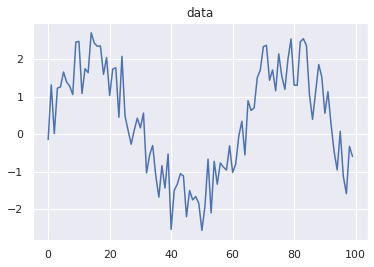

In [22]:
plt.plot(data)
plt.title("data")
plt.show()

# Q1:

![image.png](/home/mohaddeseh/Documents/Programing/Computational/HW8/n-pint.png)

## 3-point:

In [27]:
def derivative_3p(f):
    """ompute the derivative of signal with 3-point neighbors in central difference formula

    Args:
        f (list or array): data

    Returns:
        1d_array: derivative of data
    """
    h = 1
    N = len(f)
    dr = []
    dr.append((f[1]-f[0])/(2*h))
    for i in range(1,N-1):
        dr.append((f[i+1]-f[i-1])/(2*h))
    return np.array(dr)    

In [28]:
d3 = derivative_3p(data)

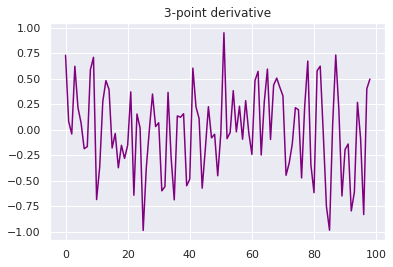

In [29]:
plt.plot(d3, color="purple")
plt.title("3-point derivative")
plt.show()

## 5-point:

In [34]:
def derivative_5p(f):
    """ompute the derivative of signal with 5-point neighbors in central difference formula

    Args:
        f (list or array): data

    Returns:
        1d_array: derivative of data
    """
    h = 1
    N = len(f)
    dr = []
    dr.append((f[1]-f[0])/(2*h))
    dr.append((f[2]-f[1])/(2*h))
    for i in range(2,N-2):
        dr.append((f[i-2]-8*f[i-1]+8*f[i+1]-f[i+2])/(12*h))
    dr.append((f[N-1]-f[N-2])/(2*h))
    return np.array(dr)    

In [35]:
d5 = derivative_5p(data)

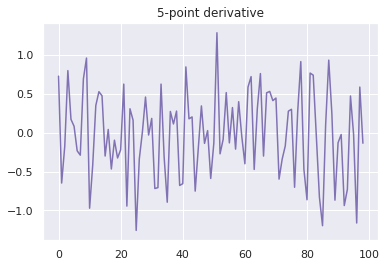

In [38]:
plt.plot(d5, color="m")
plt.title("5-point derivative")
plt.show()

## 7-point:

In [57]:
def derivative_7p(f):
    """ompute the derivative of signal with 7-point neighbors in central difference formula

    Args:
        f (list or array): data

    Returns:
        1d_array: derivative of data
    """
    h = 1
    N = len(f)
    dr = []
    dr.append((f[1]-f[0])/(2*h))
    dr.append((f[2]-f[1])/(2*h))
    dr.append((f[3]-f[2])/(2*h))
    for i in range(3,N-3):
        dr.append((-f[i-3]+9*f[i-2]-45*f[i-1]+45*f[i+1]-9*f[i+2]+f[i+3])/(60*h))
    dr.append((f[N-2]-f[N-3])/(2*h))
    dr.append((f[N-1]-f[N-2])/(2*h))
    return np.array(dr)    

In [58]:
d7 = derivative_7p(data)

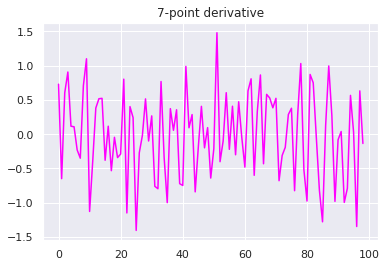

In [59]:
plt.plot(d7, color="magenta")
plt.title("7-point derivative")
plt.show()

## 9-point:

In [70]:
def derivative_9p(f):
    """ompute the derivative of signal with 9-point neighbors in central difference formula

    Args:
        f (list or array): data

    Returns:
        1d_array: derivative of data
    """
    h = 1
    N = len(f)
    dr = []
    dr.append((f[1]-f[0])/(2*h))
    dr.append((f[2]-f[1])/(2*h))
    dr.append((f[3]-f[2])/(2*h))
    dr.append((f[4]-f[3])/(2*h))
    for i in range(4,N-4):
        dr.append((3*f[i-4]-32*f[i-3]+168*f[i-2]-672*f[i-1]+672*f[i+1]-168*f[i+2]+32*f[i+3]-3*f[i+4])/(840*h))
    dr.append((f[N-4]-f[N-3])/(2*h))
    dr.append((f[N-3]-f[N-4])/(2*h))
    dr.append((f[N-2]-f[N-3])/(2*h))
    dr.append((f[N-1]-f[N-2])/(2*h))
    return np.array(dr)    

In [71]:
d9 = derivative_9p(data)

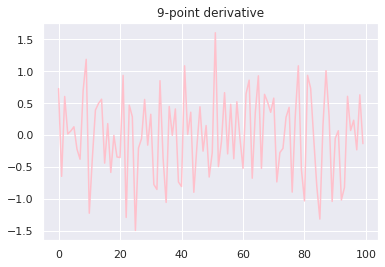

In [72]:
plt.plot(d9, color="pink")
plt.title("9-point derivative")
plt.show()

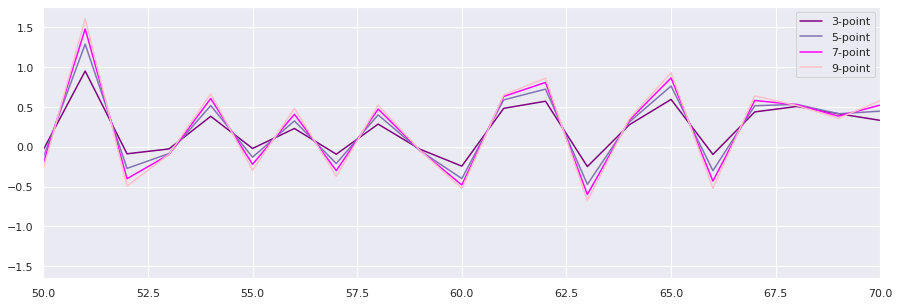

In [79]:
plt.figure(figsize=(15,5))
plt.plot(d3, color="purple", label="3-point")
plt.plot(d5, color="m", label="5-point")
plt.plot(d7, color="magenta", label="7-point")
plt.plot(d9, color="pink", label="9-point")
plt.legend()
plt.xlim(50,70)
plt.show()

# Q2:

## A)

In [193]:
#initial condition
dx = 0.05
f1 = 1
X = np.arange(1, 2.05, dx)
N = len(X)

### Explicit approach

In [194]:
fe = np.zeros(N)
fe[0] = f1
for i in range(N-1):
    fe[i+1] = fe[i]+ dx*(fe[i]**2)

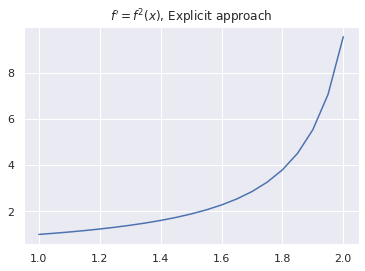

In [195]:
plt.plot(X, fe)
plt.title(r"$f'=f^2(x)$, Explicit approach")
plt.show()

### Implicit approach

In [196]:
fi = np.zeros(N)
fi[0] = f1
for i in range(N-1):
    fi[i+1] = (1 - ((1 - (4*fi[i]*dx))**0.5))/(2*dx)

/tmp/ipykernel_7574/208837291.py:4: RuntimeWarning: invalid value encountered in double_scalars
  fi[i+1] = (1 - ((1 - (4*fi[i]*dx))**0.5))/(2*dx)


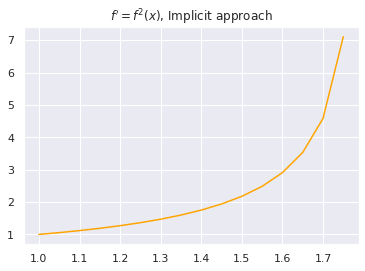

In [197]:
plt.plot(X, fi, color="orange")
plt.title(r"$f'=f^2(x)$, Implicit approach")
plt.show()

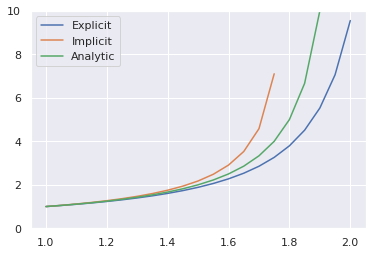

In [200]:
plt.plot(X,fe, label="Explicit")
plt.plot(X,fi, label="Implicit")
plt.plot(X[:-1], (1/(2-X))[:-1], label="Analytic")
plt.ylim(0,10)
plt.legend()
plt.show()

As we can see, the explicit approach is closest to analytic approach.

## B)

In [80]:
#initial condition
dx = 0.5
f1 = 1
X = np.arange(1,20,dx)
N = len(X)

### Explicit approach

In [81]:
fe = np.zeros(N)
fe[0] = f1
for i in range(N-1):
    fe[i+1] = (1-dx)*fe[i]

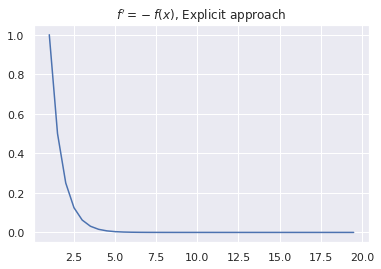

In [82]:
plt.plot(X,fe)
plt.title(r"$f'=-f(x)$, Explicit approach")
plt.show()

### Implicit approach

In [83]:
fi = np.zeros(N)
fi[0] = f1
for i in range(N-1):
    fi[i+1] = (fi[i])/(1+dx)

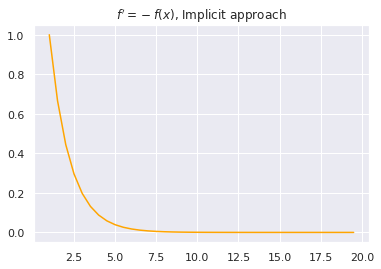

In [84]:
plt.plot(X,fi, color="orange")
plt.title(r"$f'=-f(x)$, Implicit approach")
plt.show()

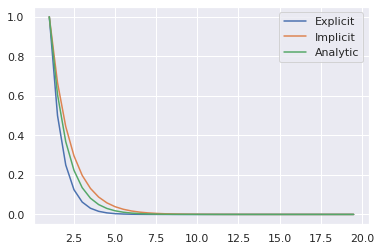

In [85]:
plt.plot(X,fe, label="Explicit")
plt.plot(X,fi, label="Implicit")
plt.plot(X,np.exp(-X+1), label="Analytic")
plt.legend()
plt.show()

As we can see, the implicit approach is closest to analytic approach.

# Q3:

In [223]:
a = 1
w2 = 1
w1 = 1
dt = 0.01
T = np.arange(0, 20, dt)
N = len(T)

## Euler method

In [224]:
y = np.zeros(N)
y[0] = 1
v = np.zeros(N)

In [225]:
for t in range(N-1):
    v[t+1] = v[t] + dt*(np.cos(w1*T[t]) - a*v[t] - w2 * y[t])
    y[t+1] = y[t] + dt*(v[t])

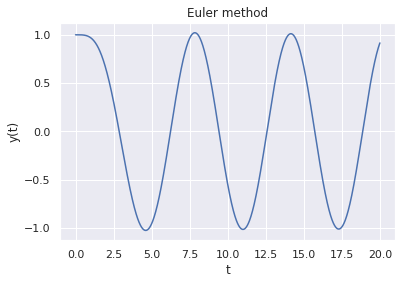

In [226]:
plt.plot(T,y)
plt.title("Euler method")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.show()

## RKF45:

In [227]:
Y = np.zeros(N)
Y[0] = 1
V = np.zeros(N)

In [228]:
for t in range(N-1):
    f1 = V[t]
    k1 = np.cos(w1*T[t]) - w2*Y[t] - (a * f1)

    f2 = V[t] + (dt/2)*k1
    k2 = np.cos(w1*(T[t]+(dt/2))) - w2*(Y[t]+(dt/2)*f1) - f2

    f3 = V[t] + (dt/2)*k2
    k3 = np.cos(w1*(T[t]+(dt/2))) - w2*(Y[t]+(dt/2)*f2) - f3

    f4 = V[t] + (dt/2)*k3
    k4 = np.cos(w1*(T[t]+(dt/2))) - w2*(Y[t]+(dt/2)*f3) - f4

    V[t+1] = V[t] + (dt/6) * (k1+ 2*k2 + 2*k3 + k4)
    Y[t+1] = Y[t] + (dt/6) * (f1+ 2*f2 + 2*f3 + f4)

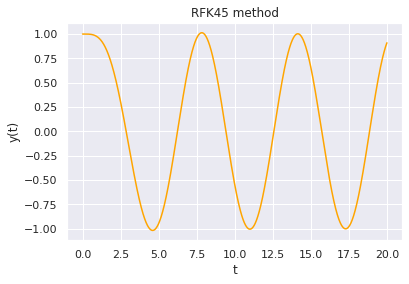

In [236]:
plt.plot(T,Y, color="orange")
plt.title("RFK45 method")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.show()

# Q4:

![image.png](/home/mohaddeseh/Documents/Programing/Computational/HW8/relaxation.jpg)

In [231]:
a = 1
w2 = 1
w1 = 1
dt = 0.01
T = np.arange(0, 20, dt)
N = len(T)
f = np.random.uniform(-1,1,N)
f[0] = 1
f[-1] = (y[-1] + Y[-1]) /2

In [233]:
for _ in range(N**2):
    x = np.random.randint(1,N-1)
    f[x] = ((2+a*dt) * y[x+1] + (2-a*dt) * y[x-1] - (2*(dt**2)*np.cos(w1*T[x])))/(4+(2*a*w2*dt**2))

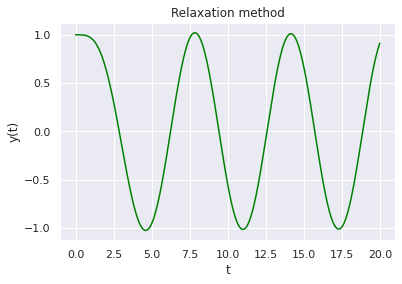

In [247]:
plt.plot(T,f, color="green")
plt.title("Relaxation method")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.show()

As we can see, all four method are same result.

# Q5:

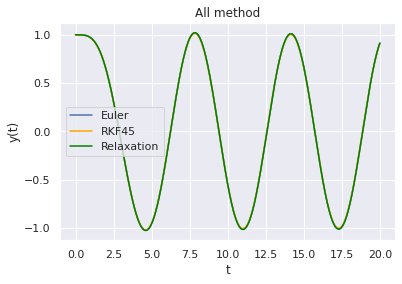

In [243]:
plt.plot(T,y, label="Euler")
plt.plot(T,Y, color="orange", label="RKF45")
plt.plot(T,f, color="green", label="Relaxation")
plt.title("All method")
plt.legend()
plt.xlabel("t")
plt.ylabel("y(t)")
plt.show()


# Q6:

In [4]:
#initial random lattice
lattice = np.random.random((300,300))

In [12]:
#set boundry value
lattice[:,0] = [x for x in range(300)]
lattice[0,:] = [y**2 for y in range(300)]
lattice[:,299] = 1
lattice[299,:] = 0

In [17]:
#use relaxation method for solving laplace eq.
for _ in range(300**3):
    x,y= np.random.randint(1,299,2)
    lattice[x,y] = (lattice[x+1, y] + lattice[x-1, y] + lattice[x, y+1] + lattice[x, y-1]) / 4

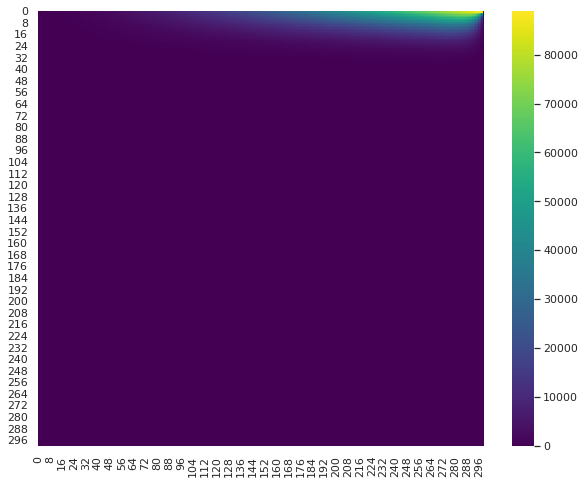

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(lattice, cmap="viridis")
plt.show()